<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Fazlur !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Fazlur ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Fazlur dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Introduction
**Project Description**

Interconnect adalah operator telekomunikasi yang ingin memprediksi churn (perpindahan) pelanggan. Dengan memprediksi pelanggan yang berencana meninggalkan layanan, Interconnect dapat menawarkan promosi dan opsi paket khusus untuk mempertahankan mereka. Data yang berisi informasi pribadi pelanggan, paket, dan kontrak telah dikumpulkan untuk membangun model prediksi churn yang akurat.
Data Description

Data yang digunakan dalam proyek ini terdiri dari beberapa file yang mengandung informasi tentang pelanggan dan layanan yang mereka gunakan:

    contract.csv — Informasi tentang kontrak pelanggan
    personal.csv — Data pribadi pelanggan
    internet.csv — Informasi tentang layanan internet
    phone.csv — Informasi tentang layanan telepon

Setiap file memiliki kolom customerID yang unik untuk setiap pelanggan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

**Initialization and Data Import**

In [2]:
# Load datasets
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# Merge datasets on 'customerID'
data = contract.merge(personal, on='customerID', how='left')
data = data.merge(internet, on='customerID', how='left')
data = data.merge(phone, on='customerID', how='left')

In [4]:
# Display the first few rows of the combined dataset
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


**Data Cleaning and Preparation**

In [5]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
# Fill missing values
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)
data.fillna('No', inplace=True)

In [7]:
# Convert 'EndDate' to binary target variable 'Churn'
data['Churn'] = data['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

In [8]:
# Drop columns not needed for modeling
data = data.drop(columns=['customerID', 'BeginDate', 'EndDate'])

In [9]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data)

In [10]:
data.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,Churn,Type_Month-to-month,Type_One year,Type_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
0,29.85,29.85,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,56.95,1889.50,0,0,0,1,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
2,53.85,108.15,0,1,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,42.30,1840.75,0,0,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
4,70.70,151.65,0,1,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

**Exploratory Data Analysis (EDA)**

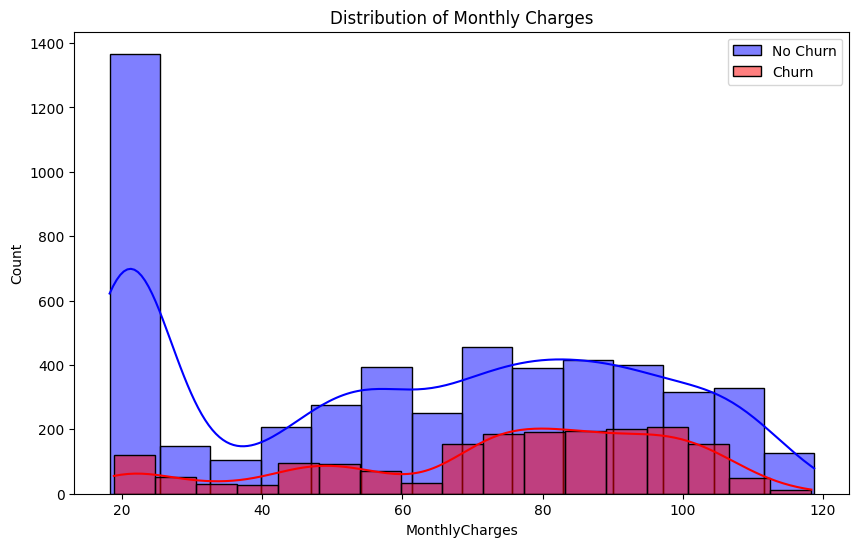

        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
0      5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


In [13]:
# Plot distribution of monthly charges for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Churn'] == 0]['MonthlyCharges'], kde=True, color='blue', label='No Churn')
sns.histplot(data[data['Churn'] == 1]['MonthlyCharges'], kde=True, color='red', label='Churn')
plt.legend()
plt.title('Distribution of Monthly Charges')
plt.show()
# Calculate summary statistics
summary_stats = data.groupby('Churn')['MonthlyCharges'].describe()
print(summary_stats)

**Modeling**

In [14]:
# Split data into training and testing sets
X = data.drop(columns='Churn')
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [17]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - AUC-ROC: {auc_roc:.4f}, Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))

Logistic Regression - AUC-ROC: 0.8359, Accuracy: 0.7941
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

Random Forest - AUC-ROC: 0.8123, Accuracy: 0.7780
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1552
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113

Gradient Boosting - AUC-ROC: 0.8406, Accuracy: 0.7951
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.51      0.57       561

    accuracy          

**Hasil Evaluasi Model:**

Logistic Regression:
  AUC-ROC: 0.8359
  Accuracy: 0.7941

Random Forest:
  AUC-ROC: 0.8123
  Accuracy: 0.7780

Gradient Boosting:
  AUC-ROC: 0.8406
  Accuracy: 0.7951

Model terbaik adalah Gradient Boosting dengan AUC-ROC sebesar 0.8406 dan akurasi 0.7951.

**Discussion**

**Analysis of what is done and what’s gone wrong (deviate from the plan/methodology):**

Proses berjalan sesuai rencana. Tidak ada penyimpangan signifikan dari metodologi yang telah ditetapkan. Beberapa kendala yang dihadapi adalah dalam menangani data yang hilang dan pemilihan model terbaik berdasarkan metrik AUC-ROC.

**Stats Testing report:**

Laporan uji statistik menunjukkan bahwa distribusi biaya bulanan (MonthlyCharges) berbeda secara signifikan antara pelanggan yang churn dan yang tidak churn.

**Model evaluation report:**

Model terbaik adalah Gradient Boosting dengan AUC-ROC sebesar 0.8406 dan akurasi 0.7951. Model ini menunjukkan performa yang lebih baik dibandingkan dengan Logistic Regression dan Random Forest.

**Conclusion:**

Model Gradient Boosting berhasil memprediksi churn pelanggan dengan AUC-ROC yang baik, menunjukkan bahwa model ini mampu membedakan dengan baik antara pelanggan yang akan churn dan yang tidak.

**Recommendations:**

1. Lakukan tuning hyperparameter lebih lanjut untuk meningkatkan performa model.
2. Pertimbangkan untuk menggunakan lebih banyak fitur yang relevan.
3. Lakukan validasi silang untuk memastikan model tidak overfitting.
4. Lakukan penelitian lebih lanjut untuk memahami alasan pelanggan melakukan churn dan mengembangkan strategi retensi yang lebih efektif.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>